# visual kutubxonalar

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('personality_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [4]:
df['Personality']

0       Extrovert
1       Introvert
2       Introvert
3       Extrovert
4       Extrovert
          ...    
2895    Extrovert
2896    Extrovert
2897    Introvert
2898    Introvert
2899    Extrovert
Name: Personality, Length: 2900, dtype: object

In [5]:
df['Personality'] = df['Personality'].astype(str).str.strip().str.lower().map({
    'introvert': 0,
    'extrovert': 1
})


df = df.dropna(subset=['Personality'])


df['Personality'] = df['Personality'].astype(int)


# astype(str) –      qiymatlarni matnga aylantiradi (hatto 1, 0, NaN bo‘lsa ham).

# str.strip() –       bo‘sh joy (space, tab)larni olib tashlaydi.

# str.lower() –       harflarni kichik harfga o‘zgartiradi (Yes → yes).


# map({...}) – qiymatlarni 0 yoki 1 ga xaritlaydi:
# 'introvert': 0,
# 'extrovert': 1
# Agar qiymat xaritada bolmasa (masalan: 'maybe', 'unknown'), natija NaN boladi.



# df = df.dropna(subset=['Personality'])
# Personality ustunida NaN (noma’lum yoki mos kelmagan) bo‘lgan satrlarni olib tashlaydi.
# Masalan, 'maybe', 'unknown', '?' kabi qiymatlar yuqorida map() orqali NaN bolib qolgandi – ular endi ochiriladi.



# df['Personality'] = df['Personality'].astype(int)
# Endi qolgan qiymatlar 1.0 yoki 0.0 (float bolishi mumkin), ularni toliq int (1, 0) ga otkazadi.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   int32  
dtypes: float64(5), int32(1), object(2)
memory usage: 170.1+ KB


In [ ]:
# 1. DataFrame bo‘sh yoki yo‘qligini tekshirish
# print(df.empty)  # True bo‘lsa, DataFrame bo‘sh

# 2. Nechta qator va ustun borligini tekshirish
# print(df.shape)  # (0, 8) — 0 qator, 8 ustun

# 3. Birinchi bir nechta qatorni ko‘rish
# print(df.head())  # hech narsa chiqmasa, DataFrame bo‘sh

# 4. Qayta ma’lumot yuklash kerak bo‘lsa
# df = pd.read_csv("path_to_your_file.csv")

In [9]:
def tozala(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype=='object':
                df[col].fillna(df[col].mode()[0],inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)
result=tozala(df)                

In [10]:
print(df)

      Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0                  4.0         No                      4.0            6.0   
1                  9.0        Yes                      0.0            0.0   
2                  9.0        Yes                      1.0            2.0   
3                  0.0         No                      6.0            7.0   
4                  3.0         No                      9.0            4.0   
...                ...        ...                      ...            ...   
2895               3.0         No                      7.0            6.0   
2896               3.0         No                      8.0            3.0   
2897               4.0        Yes                      1.0            1.0   
2898              11.0        Yes                      1.0            3.0   
2899               3.0         No                      6.0            6.0   

     Drained_after_socializing  Friends_circle_size  Post_frequency  \
0   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int32  
dtypes: float64(5), int32(1), object(2)
memory usage: 170.1+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder1=LabelEncoder()

In [13]:
def Encoder(df):
    df = df.copy()
    encoder1 = LabelEncoder()

    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].nunique() <= 6:
                dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
                df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
            else:
                df[col] = label_encoder.fit_transform(df[col])
    
    return df

In [14]:
df= Encoder(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               2900 non-null   float64
 1   Social_event_attendance        2900 non-null   float64
 2   Going_outside                  2900 non-null   float64
 3   Friends_circle_size            2900 non-null   float64
 4   Post_frequency                 2900 non-null   float64
 5   Personality                    2900 non-null   int32  
 6   Stage_fear_No                  2900 non-null   int32  
 7   Stage_fear_Yes                 2900 non-null   int32  
 8   Drained_after_socializing_No   2900 non-null   int32  
 9   Drained_after_socializing_Yes  2900 non-null   int32  
dtypes: float64(5), int32(5)
memory usage: 170.1 KB


In [ ]:
# Biz DecisionTree ni ishlatmoqchimiz shuning uchun scaling qilmasak ham boladi

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,1,1,0,1,0
1,9.0,0.0,0.0,0.0,3.0,0,0,1,0,1
2,9.0,1.0,2.0,5.0,2.0,0,0,1,0,1
3,0.0,6.0,7.0,14.0,8.0,1,1,0,1,0
4,3.0,9.0,4.0,8.0,5.0,1,1,0,1,0


In [19]:
def skeling(df):
    df = df.copy()
    scaler=StandardScaler()
    for col in df.columns:
        if df[col].dtype=='int64' or df[col].dtype=='float64':
            df[col]=scaler.fit_transform(df[[col]])
    return df

In [20]:
df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,-0.147014,0.012759,1.350613,1.590680,0.496104,1,1,0,1,0
1,1.306226,-1.379944,-1.350613,-1.481437,-0.195199,0,0,1,0,1
2,1.306226,-1.031768,-0.450204,-0.299853,-0.540850,0,0,1,0,1
3,-1.309607,0.709111,1.800817,1.826996,1.533059,1,1,0,1,0
4,-0.437663,1.753638,0.450204,0.409096,0.496104,1,1,0,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               2900 non-null   float64
 1   Social_event_attendance        2900 non-null   float64
 2   Going_outside                  2900 non-null   float64
 3   Friends_circle_size            2900 non-null   float64
 4   Post_frequency                 2900 non-null   float64
 5   Personality                    2900 non-null   int32  
 6   Stage_fear_No                  2900 non-null   int32  
 7   Stage_fear_Yes                 2900 non-null   int32  
 8   Drained_after_socializing_No   2900 non-null   int32  
 9   Drained_after_socializing_Yes  2900 non-null   int32  
dtypes: float64(5), int32(5)
memory usage: 170.1 KB


# Visual Kutubxonalar

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

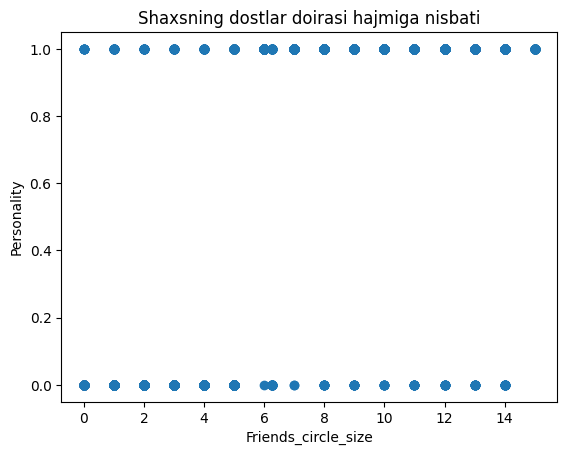

In [17]:
# Matplotlib
plt.scatter(df['Friends_circle_size'],df['Personality'])
plt.title(f"Shaxsning dostlar doirasi hajmiga nisbati")
plt.xlabel('Friends_circle_size')
plt.ylabel('Personality')
plt.show()

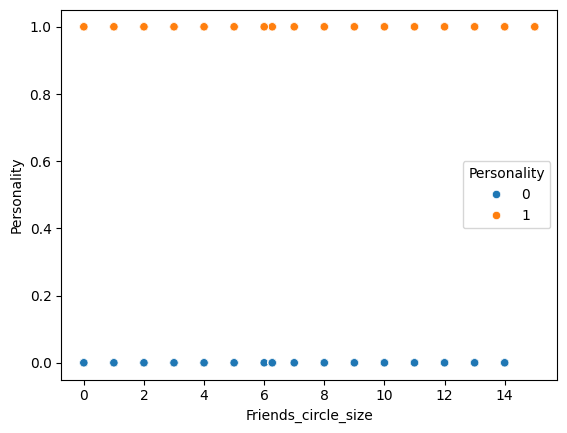

In [18]:
# Seaborn

sns.scatterplot(data=df,x='Friends_circle_size',y='Personality',hue='Personality')

plt.show()

In [19]:
# Plotly express

fig=px.scatter(df,x='Friends_circle_size',y='Personality',title='Shaxsning dostlar doirasi hajmiga nisbati', labels={
    'Personality':'Personality(0:Introvert, 1=Extrovert)'
})

fig.show()

In [20]:
x=df.drop('Personality',axis=1)

In [21]:
y=df['Personality']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
2078,3.0,5.0,6.0,10.0,9.0,1,0,1,0
163,6.0,3.0,3.0,1.0,0.0,0,1,0,1
1938,10.0,2.0,2.0,1.0,0.0,0,1,0,1
252,9.0,1.0,2.0,3.0,1.0,0,1,0,1
2232,10.0,0.0,0.0,4.0,1.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1638,2.0,7.0,4.0,12.0,8.0,1,0,1,0
1095,0.0,7.0,4.0,14.0,6.0,1,0,1,0
1130,11.0,1.0,1.0,4.0,2.0,0,1,0,1
1294,10.0,3.0,1.0,5.0,0.0,0,1,0,1


In [25]:
y_train

2078    1
163     0
1938    0
252     0
2232    0
       ..
1638    1
1095    1
1130    0
1294    0
860     0
Name: Personality, Length: 2320, dtype: int32

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt_model1=DecisionTreeClassifier(max_depth=3,min_samples_split=3)

In [42]:
dt_model1

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [43]:
dt_model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [44]:
y_pred=dt_model1.predict(x_test)

In [45]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accu1=accuracy_score(y_pred,y_test)

In [48]:
# Hyperparametr Tuningsiz natijani korish
print(f"Modelning aniqligi:{accu1*100}%")

Modelning aniqligi:92.93103448275862%


In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

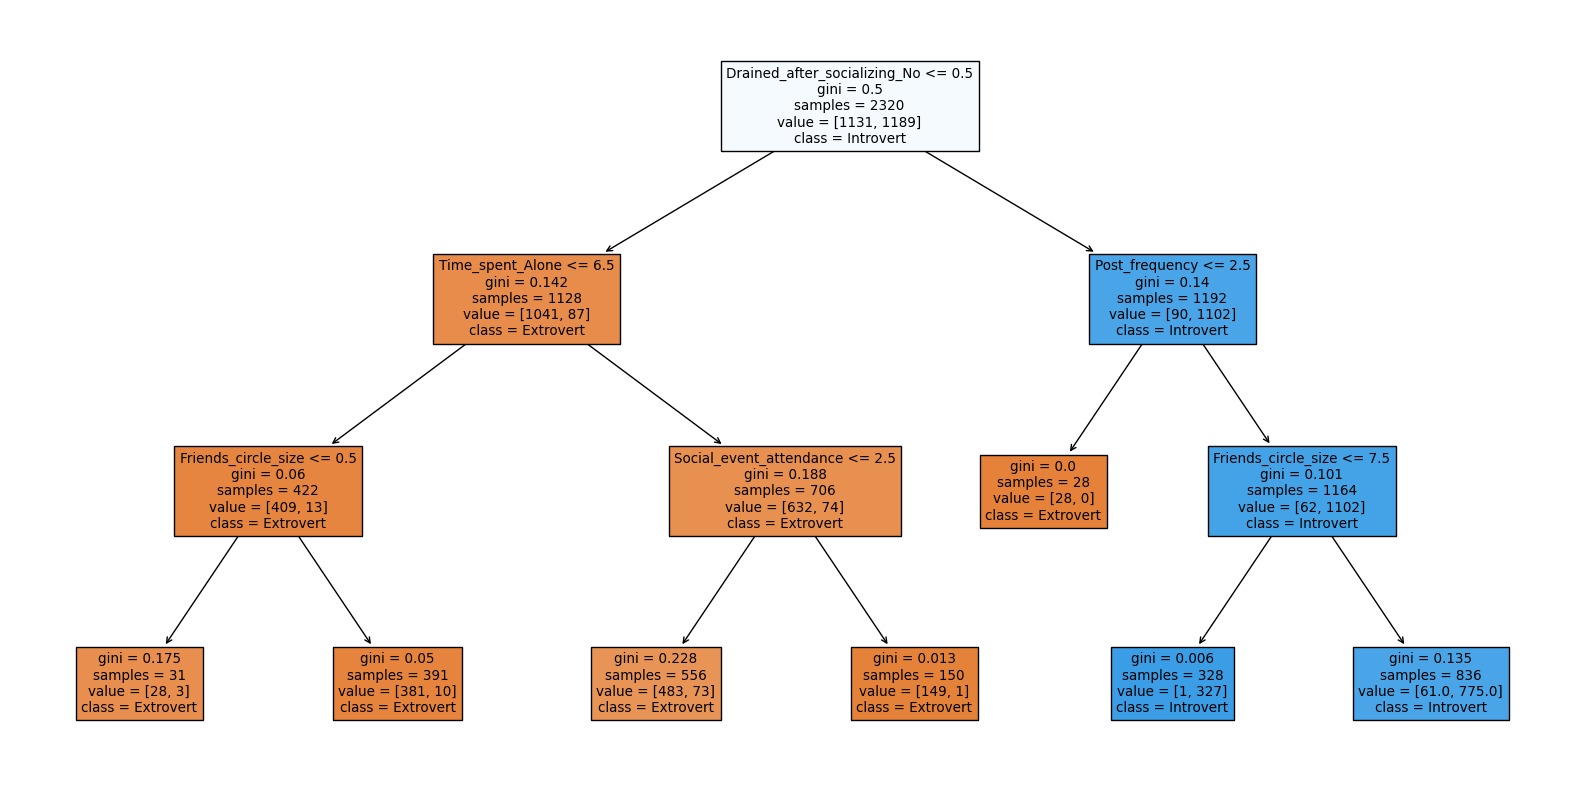

In [53]:
plt.figure(figsize=(20,10))      
plot_tree(dt_model1,feature_names=x.columns,class_names=['Extrovert','Introvert'],filled=True)
plt.show()

In [ ]:
# Endi Hyperparametr bilan natijani ko'ramiz

# Hyperparametr Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [57]:
grid_search = GridSearchCV(estimator=dt_model1, param_grid=param_grid, cv=5, scoring='accuracy')

In [58]:
grid_search.fit(x,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [59]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}


In [60]:
best_model=grid_search.best_estimator_

In [61]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [62]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.9341379310344827
